tensor
graph
variable
placeholder


## Tensors

The central unit of data in TensorFlow is the **tensor**. A tensor consists of a set of primitive values shaped into an array of any number of dimensions. A tensor's **rank** is its number of dimensions. Here are some examples of tensors:

In [1]:
3 # a rank 0 tensor; this is a scalar with shape []
[1., 2., 3.] # a rank 1 tensor; this is a vector with shape [3]
[[1., 2., 3.], [4., 5., 6.]] # a rank 2 tensor; a matrix with shape [2, 3]
[[[1., 2., 3.]], [[7., 8., 9.]]] # a rank 3 tensor with shape [2, 1, 3]

3

[1.0, 2.0, 3.0]

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]

[[[1.0, 2.0, 3.0]], [[7.0, 8.0, 9.0]]]

## The Computational Graph

    Building the computational graph.
    Running the computational graph.

In [2]:
#import tensorflow
import tensorflow as tf

#building the computational graph
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly

node1
node2

#running the computational graph
sess=tf.Session()
sess.run([node1,node2])

<tf.Tensor 'Const:0' shape=() dtype=float32>

<tf.Tensor 'Const_1:0' shape=() dtype=float32>

[3.0, 4.0]

可以用各种运算

<tf.Tensor 'Add:0' shape=() dtype=float32>

7.0

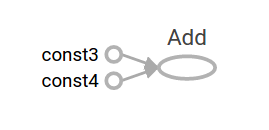

In [3]:
# building
node3 = tf.add(node1,node2)
node3

# running
sess.run(node3)

# 在tensorboard中的图形如下：
from IPython.display import Image
Image('./image/getting_started_add.png') 

## placeholder
placeholders 是用来传入外部输入数据

3.0

array([ 4.,  6.], dtype=float32)

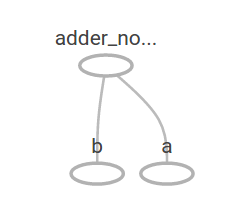

In [4]:
# define placeholders
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b  # + provides a shortcut for tf.add(a, b)

# feed some values to the placeholders
sess.run(adder_node,feed_dict={a:1,b:2})
sess.run(adder_node,feed_dict={a:[1,2],b:[3,4]})

# 在tensorboard looks like:
Image('./image/getting_started_adder.png') 

可以更复杂的运算

15.0

array([ 20.,  30.], dtype=float32)

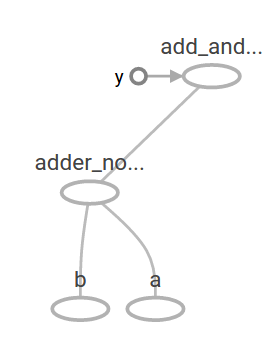

In [5]:
add_and_triple=adder_node*5
sess.run(add_and_triple,feed_dict={a:1,b:2})
sess.run(add_and_triple,feed_dict={a:[1,2],b:[3,4]})

# 在tensorboard looks like:
Image('./image/getting_started_triple.png') 



## Variables
定义模型训练中的可变参数

In [6]:
W = tf.Variable([.3], dtype=tf.float32)   # 初始值是0.3
b = tf.Variable([-.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b

# 尝试输出
W
b
linear_model

# 若强制输出结果会报错，sess.run(linear_model,feed_dict={x:1})
# 在使用Variable前，需进行初始化：
init = tf.global_variables_initializer()
sess.run(init)

# 然后再调用：
sess.run(linear_model,feed_dict={x:5})
sess.run(linear_model,feed_dict={x:[1,2,3,4,5]})


<tf.Variable 'Variable:0' shape=(1,) dtype=float32_ref>

<tf.Variable 'Variable_1:0' shape=(1,) dtype=float32_ref>

<tf.Tensor 'add_1:0' shape=<unknown> dtype=float32>

array([ 1.20000005], dtype=float32)

array([ 0.        ,  0.30000001,  0.60000002,  0.90000004,  1.20000005], dtype=float32)

## loss function measure
loss 计算预测值和真实值的差距，作为模型训练的优化目标：求最小的loss值

In [23]:
# define loss func
y=tf.placeholder(tf.float32)
squares_deltas=tf.square(linear_model-y)
loss=tf.reduce_sum(squares_deltas)

# run loss func
sess.run(loss,{x:[1,2,3,4,5],y:[0,1,2,3,4]})

#手工修改W,b值，使得等于真实值，loss降为0
sess.run(tf.assign(W,[1]))
sess.run(tf.assign(b,[-1]))
sess.run(loss,{x:[1,2,3,4,5],y:[0,1,2,3,4]})

0.0

array([ 1.], dtype=float32)

array([-1.], dtype=float32)

0.0

## Train the model
模型训练是在定义好输入数据、

In [28]:
# defin train model 
opt=tf.train.GradientDescentOptimizer(0.005)
train=opt.minimize(loss)

# train the data
sess.run(init)
for i in range(1000):
    sess.run(train,{x:[1,2,3,4,5],y:[0,1,2,3,4]})

# calc the loss
sess.run(loss,{x:[1,2,3,4,5],y:[0,1,2,3,4]})

# print the result W ,b
sess.run([W,b])

2.6570731e-08

[array([ 0.99995267], dtype=float32), array([-0.99982905], dtype=float32)]

# 完整的代码流程

define:

    train data

    placeholder
    
    prediction model
    
    loss model
    
    train model
    
    running all
    
        trainning
        
        testing

In [14]:
import tensorflow as tf

# define training data
x_real = [1,2,3,4,5]
y_real = [0,1,2,3,4]

# define placeholder 
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# define prediction model
W = tf.Variable(tf.zeros([1]),tf.float32)
b = tf.Variable(tf.zeros([1]),tf.float32)
linear_model = W * x + b

# define loss model
loss = tf.reduce_sum(tf.square(linear_model - y))

# define train model
train = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

# running all
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # trainning
    for _ in range(1000):
        sess.run(train,{x:x_real,y:y_real})
    sess.run(loss,{x:x_real,y:y_real})
    sess.run([W,b])
    
    # test result 
    y_res = sess.run(linear_model,{x:[6,7,8,9,10]})
    y_res.tolist(),[5,6,7,8,9]
    


2.5579538e-12

[array([ 0.99999952], dtype=float32), array([-0.99999833], dtype=float32)]

([4.999999046325684,
  5.999998092651367,
  6.999998092651367,
  7.999998092651367,
  8.99999713897705],
 [5, 6, 7, 8, 9])

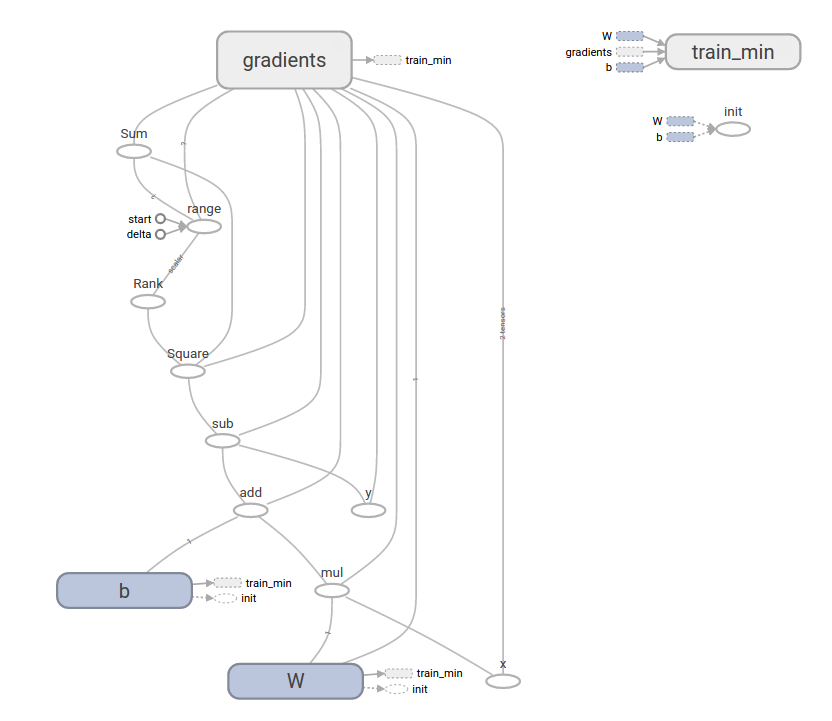

In [16]:
from IPython.display import Image
Image('./image/getting_started_final.png') 

## estimator
一种封装技术，可以写更少的代码

In [1]:
import tensorflow as tf
# NumPy is often used to load, manipulate and preprocess data.
import numpy as np

# Declare list of features. We only have one numeric feature. There are many
# other types of columns that are more complicated and useful.
feature_columns = [tf.feature_column.numeric_column("x", shape=[1])]

# An estimator is the front end to invoke training (fitting) and evaluation
# (inference). There are many predefined types like linear regression,
# linear classification, and many neural network classifiers and regressors.
# The following code provides an estimator that does linear regression.
estimator = tf.estimator.LinearRegressor(feature_columns=feature_columns)

# TensorFlow provides many helper methods to read and set up data sets.
# Here we use two data sets: one for training and one for evaluation
# We have to tell the function how many batches
# of data (num_epochs) we want and how big each batch should be.
x_train = np.array([1., 2., 3., 4.])
y_train = np.array([0., -1., -2., -3.])
x_eval = np.array([2., 5., 8., 1.])
y_eval = np.array([-1.01, -4.1, -7, 0.])
input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=None, shuffle=True)
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=1000, shuffle=False)
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_eval}, y_eval, batch_size=4, num_epochs=1000, shuffle=False)

# We can invoke 1000 training steps by invoking the  method and passing the
# training data set.
estimator.train(input_fn=input_fn, steps=1000)

# Here we evaluate how well our model did.
train_metrics = estimator.evaluate(input_fn=train_input_fn)
eval_metrics = estimator.evaluate(input_fn=eval_input_fn)
print("train metrics: %r"% train_metrics)
print("eval metrics: %r"% eval_metrics)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmplt35h5b2', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmplt35h5b2/model.ckpt.
INFO:tensorflow:loss = 13.0, step = 1
INFO:tensorflow:global_step/sec: 660.797
INFO:tensorflow:loss = 0.261344, step = 101 (0.159 sec)
INFO:tensorflow:global_step/sec: 688.575
INFO:tensorflow:loss = 0.0398959, step = 201 (0.142 sec)
INFO:tensorflow:global_step/sec: 691.317
INFO:tensorflow:loss = 0.00113893, step = 301 (0.145 sec)
INFO:tensorflow:global_step/sec: 710.338
INFO:tensorflow:loss = 0.00109746, step = 401 (0.139 sec)
INFO:tensorflow:global_step/sec: 695.338
INFO:tensorflow:loss = 0.000266113, step = 501 (0.143 sec)
INFO:tenso

INFO:tensorflow:Starting evaluation at 2017-08-29-08:54:48
INFO:tensorflow:Restoring parameters from /tmp/tmplt35h5b2/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-08-29-08:54:49
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.37586e-08, global_step = 1000, loss = 5.50344e-08
INFO:tensorflow:Starting evaluation at 2017-08-29-08:54:49
INFO:tensorflow:Restoring parameters from /tmp/tmplt35h5b2/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-08-29-08:54:50
INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.00253472, global_step = 1000, loss = 0.0101389
train metrics: {'average_loss': 1.3758599e-08, 'loss': 5.5034395e-08, 'global_step': 1000}
eval metrics: {'average_loss': 0.0025347215, 'loss': 0.010138886, 'global_step': 1000}


In [ ]:
import tensorflow as tf 
import numpy as np
 
# 导入数据
x_train = np.array([1., 2., 3., 4.])
y_train = np.array([0., -1., -2., -3.])
x_eval = np.array([2., 5., 8., 1.])
y_eval = np.array([-1.01, -4.1, -7, 0.]) 


# 定义输入数据集
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=1000, shuffle=False)
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_eval}, y_eval, batch_size=4, num_epochs=1000, shuffle=False)
 
# 定义训练数据的维度
feature_columns = [tf.feature_column.numeric_column("x", shape=[1])]

# 定义线性回归模型
estimator = tf.estimator.LinearRegressor(feature_columns=feature_columns)
 
# 训练模型
estimator.train(input_fn=train_input_fn, steps=1000) 

# 评估训练结果
train_metrics = estimator.evaluate(input_fn=train_input_fn)
eval_metrics = estimator.evaluate(input_fn=eval_input_fn)
print("train metrics: %r"% train_metrics)
print("eval metrics: %r"% eval_metrics)

In [24]:
estimator.predict(input_fn=[1.0])

<generator object Estimator.predict at 0x7f24434f3888>

## A custom model



In [3]:
import numpy as np
import tensorflow as tf

# Declare list of features, we only have one real-valued feature
def model_fn(features, labels, mode):
  # Build a linear model and predict values
  W = tf.get_variable("W", [1], dtype=tf.float64)
  b = tf.get_variable("b", [1], dtype=tf.float64)
  y = W * features['x'] + b
  # Loss sub-graph
  loss = tf.reduce_sum(tf.square(y - labels))
  # Training sub-graph
  global_step = tf.train.get_global_step()
  optimizer = tf.train.GradientDescentOptimizer(0.01)
  train = tf.group(optimizer.minimize(loss),
                   tf.assign_add(global_step, 1))
  # EstimatorSpec connects subgraphs we built to the
  # appropriate functionality.
  return tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=y,
      loss=loss,
      train_op=train)

estimator = tf.estimator.Estimator(model_fn=model_fn)
# define our data sets
x_train = np.array([1., 2., 3., 4.])
y_train = np.array([0., -1., -2., -3.])
x_eval = np.array([2., 5., 8., 1.])
y_eval = np.array([-1.01, -4.1, -7, 0.])
input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=None, shuffle=True)
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=1000, shuffle=False)
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_eval}, y_eval, batch_size=4, num_epochs=1000, shuffle=False)

# train
estimator.train(input_fn=input_fn, steps=1000)
# Here we evaluate how well our model did.
train_metrics = estimator.evaluate(input_fn=train_input_fn)
eval_metrics = estimator.evaluate(input_fn=eval_input_fn)
print("train metrics: %r"% train_metrics)
print("eval metrics: %r"% eval_metrics)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp49f7lulx', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp49f7lulx/model.ckpt.
INFO:tensorflow:loss = 8.66328258808, step = 1
INFO:tensorflow:global_step/sec: 757.065
INFO:tensorflow:loss = 0.112588924585, step = 101 (0.138 sec)
INFO:tensorflow:global_step/sec: 733.99
INFO:tensorflow:loss = 0.00314240188488, step = 201 (0.136 sec)
INFO:tensorflow:global_step/sec: 763.052
INFO:tensorflow:loss = 0.000467953741467, step = 301 (0.130 sec)
INFO:tensorflow:global_step/sec: 672.474
INFO:tensorflow:loss = 1.30569423714e-05, step = 401 (0.146 sec)
INFO:tensorflow:global_step/sec: 658.939
INFO:tensorflow:loss = 2.123172479

INFO:tensorflow:Starting evaluation at 2017-08-29-09:44:53
INFO:tensorflow:Restoring parameters from /tmp/tmp49f7lulx/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-08-29-09:44:54
INFO:tensorflow:Saving dict for global step 1000: global_step = 1000, loss = 1.11531e-11
INFO:tensorflow:Starting evaluation at 2017-08-29-09:44:54
INFO:tensorflow:Restoring parameters from /tmp/tmp49f7lulx/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-08-29-09:44:55
INFO:tensorflow:Saving dict for global step 1000: global_step = 1000, loss = 0.0101007
train metrics: {'loss': 1.1153098e-11, 'global_step': 1000}
eval metrics: {'loss': 0.010100719, 'global_step': 1000}


In [ ]:
import tensorflow as tf
# NumPy is often used to load, manipulate and preprocess data.
import numpy as np

# Declare list of features. We only have one numeric feature. There are many
# other types of columns that are more complicated and useful.
feature_columns = [tf.feature_column.numeric_column("x", shape=[1])]

# An estimator is the front end to invoke training (fitting) and evaluation
# (inference). There are many predefined types like linear regression,
# linear classification, and many neural network classifiers and regressors.
# The following code provides an estimator that does linear regression.
estimator = tf.estimator.LinearRegressor(feature_columns=feature_columns)

# TensorFlow provides many helper methods to read and set up data sets.
# Here we use two data sets: one for training and one for evaluation
# We have to tell the function how many batches
# of data (num_epochs) we want and how big each batch should be.
x_train = np.array([1., 2., 3., 4.])
y_train = np.array([0., -1., -2., -3.])
x_eval = np.array([2., 5., 8., 1.])
y_eval = np.array([-1.01, -4.1, -7, 0.])
input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=None, shuffle=True)
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=1000, shuffle=False)
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_eval}, y_eval, batch_size=4, num_epochs=1000, shuffle=False)

# We can invoke 1000 training steps by invoking the  method and passing the
# training data set.
estimator.train(input_fn=input_fn, steps=1000)

# Here we evaluate how well our model did.
train_metrics = estimator.evaluate(input_fn=train_input_fn)
eval_metrics = estimator.evaluate(input_fn=eval_input_fn)

print("train metrics: %r"% train_metrics)
print("eval metrics: %r"% eval_metrics)

In [2]:
estimator.params

{}